# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [2]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [3]:
cat=Table.read('./data/dmu26_XID+SPIRE_EGS_cat.fits')


In [4]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J141453.668+511306.073,213.72361659573448,51.218353525990594,4.7803884,8.291953,1.5855047,-9.660023,-2.7625663,-16.04559,6.2793226,10.948691,1.7679659,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.999465,0.99924135,0.99999505,2334.3494,2586.4397,3244.818,0.041,0.285,0.042
HELP_J141454.441+511332.229,213.72683862574598,51.2256192135701,5.0861464,8.346615,1.7082578,4.9843397,8.356362,1.5841892,4.997069,8.457114,1.5323603,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.99939495,0.99855995,1.0008386,2794.6575,2542.403,3155.7454,0.049,0.051,0.055
HELP_J141454.953+511249.580,213.728969625746,51.2137722135701,5.044551,8.436904,1.45414,492.5282,844.5281,154.33974,4.9619164,8.372946,1.6554714,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.99906635,0.99902993,0.9985866,2969.941,3159.0027,2929.3616,0.036,0.0,0.05
HELP_J141455.061+511348.926,213.729421625746,51.2302572135701,4.975995,8.274596,1.7853456,13.595784,22.328407,4.3704643,4.966047,8.414661,1.5256387,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.99826694,0.9991264,0.9998315,3531.306,2919.6982,2895.082,0.049,0.183,0.044
HELP_J141455.137+511345.913,213.729738625746,51.2294202135701,4.917512,8.225846,1.8137441,13.757754,22.4778,4.230474,5.120607,8.50268,1.6562948,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.9990354,1.0001667,0.998321,3518.9038,3853.61,2311.6316,0.047,0.183,0.044
HELP_J141455.171+511353.232,213.72988062574598,51.2314532135701,504.3279,836.49225,144.42146,5.029436,8.392202,1.5257226,500.18246,838.5611,159.332,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,1.0017918,0.99952793,0.99994135,2568.7466,3169.1724,3136.6968,0.0,0.043,0.0
HELP_J141455.305+511255.678,213.730438625746,51.2154662135701,4.899315,8.272308,1.6744055,5.1178155,8.444843,1.7892746,5.069274,8.382251,1.5336076,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.99887383,0.9986121,0.9987758,2833.872,3320.4868,2949.7017,0.04,0.056,0.05
HELP_J141455.587+511315.111,213.73161162574598,51.2208642135701,-6.79484,-2.3011417,-11.543856,-13.565776,-4.550081,-22.603544,-7.4835496,-2.3631244,-12.561888,0.0053882496,0.00014050482,0.008817047,0.03234634,0.049470276,0.06350016,0.99862975,0.9985304,0.99976546,2921.0452,4107.507,3694.057,0.14,0.149,0.308


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


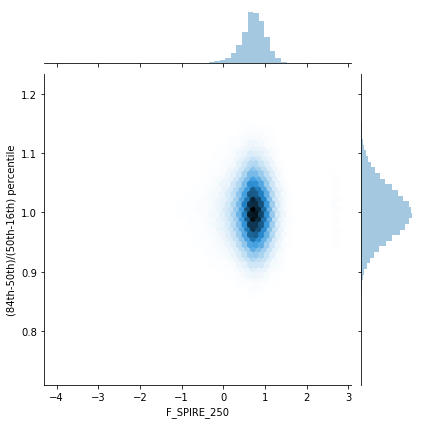

In [5]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


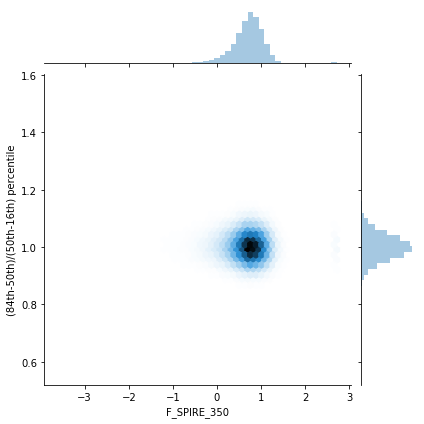

In [6]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


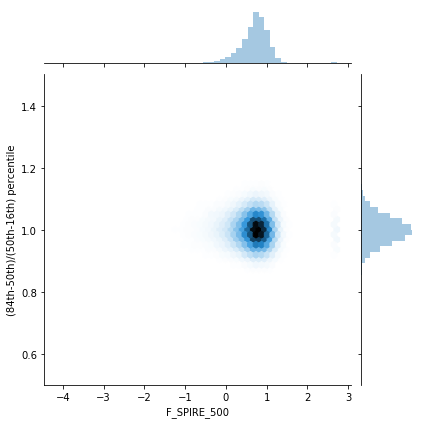

In [7]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [9]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [12]:
ind_250= cat['Pval_res_250']>0.5
ind_350= cat['Pval_res_350']>0.5
ind_500= cat['Pval_res_500']>0.5


In [13]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

95589 126901 85132 241556


In [14]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [15]:
cat.write('./data/dmu26_XID+SPIRE_EGS_cat_20191007.fits', format='fits',overwrite=True)
